In [1]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import statistics
import scipy.stats

In [2]:
task='Jing'
data_year = "2020"
cell_name='GI1'

data_dir = os.path.join("/Users/lidiayung/PhD_project/project_GBM/gbm_DATA/gbm_DATA_LINCs_GI1")

out_dir = "00_plots_" + data_year + "_" + cell_name + "_" 
#os.makedirs(out_dir, exist_ok = True)

## Data_norm

In [3]:
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

exp_id_list = Data_norm.index.to_list()
print("Experiments in LINCS data for " + cell_name + " cells:", len(exp_id_list), exp_id_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_GI1_24H:A03,0.014285,0.302692,0.124004,0.005246,0.340042,0.276465,0.127250,0.328650,0.627212,-0.220684,...,-0.102669,0.893785,0.505962,-0.357469,0.517504,0.255096,0.008023,-0.144581,-0.187158,-0.225612
ASG002_GI1_24H:A04,0.084985,0.276642,0.324054,-0.016954,0.079942,0.155465,-0.100200,0.345250,0.183511,-0.080484,...,-0.057569,-0.443416,0.094212,-0.303270,0.271754,-0.176304,-0.028377,0.017819,-0.187858,-0.157212
ASG002_GI1_24H:A05,-0.019615,0.183842,0.282254,-0.577354,0.316943,0.109765,0.117800,0.301150,-0.187188,0.275415,...,0.082731,-0.124365,0.141711,-0.221269,0.206753,0.215946,0.000723,0.130619,-0.080258,0.012289
ASG002_GI1_24H:A06,0.324884,0.146642,0.192004,0.043446,0.141842,-0.053335,-0.028000,-0.580550,0.622812,-0.080985,...,0.246530,0.644485,0.082212,-0.069869,0.142254,0.576146,0.092923,-0.041681,-0.253158,-0.221112
ASG002_GI1_24H:J13,0.182484,0.060892,-0.044696,-0.346554,-0.158858,-0.031434,0.068500,0.372950,-0.366439,-0.176334,...,-0.204769,-0.254016,0.310211,-0.177470,-0.026896,0.068946,0.070023,-0.011181,-0.366158,0.121888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_GI1_24H:P20,0.844125,0.359950,0.014575,0.002151,0.108225,-0.232287,0.331775,0.190337,-0.644337,-0.320262,...,-0.223550,0.344850,-0.421962,-0.379925,0.154400,0.031300,-0.095100,-0.317588,0.103650,1.095600
MOAR012_GI1_24H:P21,0.346174,0.102800,-0.449275,-0.206150,0.500625,-0.383837,0.456875,0.125388,-0.490437,-0.240913,...,-0.271100,-0.497100,-0.194638,-0.082924,-0.450300,-0.088776,0.427825,-0.431062,-0.064025,1.196051
MOAR012_GI1_24H:P22,0.195774,0.285975,-0.675725,-0.243999,0.197526,0.238638,-0.013250,-0.236763,-0.761688,-0.048863,...,-0.190250,-0.331850,-0.556237,-0.161175,-0.274225,0.178549,0.110350,0.389612,0.043350,1.345251
MOAR012_GI1_24H:P23,0.093424,0.179075,-0.400900,-0.337299,0.084625,-0.015337,-0.073375,-0.276812,0.107612,0.054488,...,0.203775,-0.216850,-1.163637,-0.258825,-0.483600,0.067650,0.465775,0.345462,1.912200,1.386475


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

## Sig_info

In [5]:
data_file = os.path.join(data_dir, "sig_info_" + data_year + "_" + cell_name+ ".xlsx")
sig_info_cell_df = pd.read_excel(data_file, index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_GI1_24H:A03,GI1,ASG002,24 h,ASG002_GI1_24H_X1_B35:A03,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_GI1_24H:A04,GI1,ASG002,24 h,ASG002_GI1_24H_X1_B35:A04,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_GI1_24H:A05,GI1,ASG002,24 h,ASG002_GI1_24H_X1_B35:A05,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_GI1_24H:A06,GI1,ASG002,24 h,ASG002_GI1_24H_X1_B35:A06,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_GI1_24H:J13,GI1,ASG002,24 h,ASG002_GI1_24H_X1_B35:J13,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_GI1_24H:P20,GI1,MOAR012,24 h,MOAR012_GI1_24H_X1_B36:P20,1,trt_cp,BAY-61-3606,,0,3.33 uM,3.33
MOAR012_GI1_24H:P21,GI1,MOAR012,24 h,MOAR012_GI1_24H_X1_B36:P21,1,trt_cp,BAY-61-3606,,0,1.11 uM,1.11
MOAR012_GI1_24H:P22,GI1,MOAR012,24 h,MOAR012_GI1_24H_X1_B36:P22,1,trt_cp,ethaverine,,0,10 uM,10.00


## Input_info - ALL_DATA (modules, STV)

In [6]:
data_file = "/Users/lidiayung/PhD_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_LINCS/ALL_DATA_2020_Jing.xlsx"
modules = pd.read_excel(data_file, sheet_name = "modules", index_col = 0)
display(modules)

""
Module
CDK1
CDK2
PAK
PI3K
ERK
BET
Aurora
TGFbR
VEGFR


## STV (State Transition Vectors)

In [84]:
#data_file = "/Users/lidiayung/PhD_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_LINCS/ALL_DATA_2020_Jing.xlsx" 

#STVs = pd.read_excel(data_file, sheet_name = "STVs", index_col = 0)
df= pd.read_csv('/Users/lidiayung/PhD_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_svm/gbm_OUTPUT_sct_P_stv_lm_norm_tum.csv',index_col=0)

display(df)

,n,s
DFFB,0.019947,-0.004744
ICMT,-0.080201,-0.003622
KLHL21,-0.012436,-0.010462
CLSTN1,0.010032,-0.032180
DFFA,0.013415,-0.020856
...,...,...
WRB,-0.047152,-0.017300
BACE2,0.014033,-0.017545
C2CD2,-0.033031,-0.028008
RRP1B,0.003411,-0.024551


In [143]:
df.loc['ZNF131','n']

-0.0215277452681743

In [141]:
common_genes_2

['ZNF131']

In [142]:
glm_coef.loc['ZNF131']

x   -0.02149
n    0.00000
Name: ZNF131, dtype: float64

In [88]:
STV_df = pd.DataFrame(
    np.zeros((len(genes_list), len(states))), 
    index = genes_list, 
    columns = states)

In [89]:
common_genes = list(set(genes_list).intersection(df.index))

In [90]:
STV_df.loc[common_genes,'p_tum_normal(-inmune)'] = df.loc[common_genes,'n']

In [102]:
STV_df['p_tum_normal(-inmune)'].sort_values(ascending=False).index

Index(['PAX8', 'SNCA', 'BTK', 'IKZF1', 'SYK', 'PTPRC', 'PCK2', 'FAS', 'KCNK1',
       'TESK1',
       ...
       'LOXL1', 'TOR1A', 'DYRK3', 'PHGDH', 'RRAGA', 'MCM3', 'GPER1', 'DCK',
       'PPIC', 'PAF1'],
      dtype='object', length=978)

## DPD calculating

In [92]:
DPD_df = pd.DataFrame(
    np.zeros((len(exp_id_list), len(states))),
    index = exp_id_list,
    columns = states,
)

for exp_id in DPD_df.index:
    for state in states:
        DPD_df.loc[exp_id, state] = np.dot(Data_norm.loc[exp_id], STV_df.loc[:, state])

display(DPD_df)

,p_tum_normal(-inmune)
ASG002_GI1_24H:A03,-0.351596
ASG002_GI1_24H:A04,0.141237
ASG002_GI1_24H:A05,-0.582075
ASG002_GI1_24H:A06,-0.059127
ASG002_GI1_24H:J13,-0.338332
...,...
MOAR012_GI1_24H:P20,1.140519
MOAR012_GI1_24H:P21,0.750272
MOAR012_GI1_24H:P22,0.487938
MOAR012_GI1_24H:P23,1.289707


In [93]:
DPD_inf_df = pd.concat([
                            DPD_df,
                            sig_info_cell_df.loc[DPD_df.index, ["pert_drug", "targets", "dose"]]
                            ], axis = 1)

display(DPD_inf_df)

,p_tum_normal(-inmune),pert_drug,targets,dose
ASG002_GI1_24H:A03,-0.351596,DMSO,DMSO_No_target,0 uM
ASG002_GI1_24H:A04,0.141237,DMSO,DMSO_No_target,0 uM
ASG002_GI1_24H:A05,-0.582075,DMSO,DMSO_No_target,0 uM
ASG002_GI1_24H:A06,-0.059127,DMSO,DMSO_No_target,0 uM
ASG002_GI1_24H:J13,-0.338332,DMSO,DMSO_No_target,0 uM
...,...,...,...,...
MOAR012_GI1_24H:P20,1.140519,BAY-61-3606,,3.33 uM
MOAR012_GI1_24H:P21,0.750272,BAY-61-3606,,1.11 uM
MOAR012_GI1_24H:P22,0.487938,ethaverine,,10 uM
MOAR012_GI1_24H:P23,1.289707,ethaverine,,3.33 uM


In [94]:
out_dir='/Users/lidiayung/PhD_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_LINCS'

In [95]:
DPD_inf_df.to_excel(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".xlsx"))
DPD_inf_df.to_csv(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".csv"))

In [111]:
normal_like_DPD=DPD_inf_df.loc[DPD_inf_df['p_tum_normal(-inmune)'].sort_values(ascending=False).head(143).index]
display(normal_like_DPD)

,p_tum_normal(-inmune),pert_drug,targets,dose
ASG002_GI1_24H:B17,5.733954,indinavir,"CYP3A4, CYP3A5, CYP3A7",1.11 uM
ASG002_GI1_24H:L01,4.608142,PHA-793887,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9",10 uM
ASG002_GI1_24H:P13,4.498112,ixazomib,PSMB1,10 uM
ASG002_GI1_24H:H22,4.373775,YM-155,BIRC5,10 uM
ASG002_GI1_24H:O01,4.314932,crizotinib,"ALK, MET",10 uM
...,...,...,...,...
ASG002_GI1_24H:M13,1.121568,mitomycin-c,,10 uM
MOAR008_GI1_24H:G15,1.115247,minodronic-acid,FDPS,1.11 uM
MOAR012_GI1_24H:I22,1.115198,fenthion,,10 uM
MOAR008_GI1_24H:A17,1.115197,etacrynic-acid,SLC12A1,3.33 uM


In [112]:
len(list(set(normal_like_DPD['pert_drug'])))

126

## Analisys of DPD values to find targets

In [103]:
i = 0
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,p_tum_normal(-inmune),pert_drug,targets,dose
MOAR011_GI1_24H:B06,-1.648560,GP-2a,CNR2,1.11 uM
MOAR009_GI1_24H:M03,-1.590801,mabuprofen,,1.11 uM
MOAR011_GI1_24H:F16,-1.566188,SC-144,,10 uM
MOAR010_GI1_24H:G22,-1.455432,allopurinol,XDH,10 uM
ASG002_GI1_24H:O08,-1.394048,calcitriol,VDR,1.11 uM
MOAR010_GI1_24H:N11,-1.392768,canrenone,NR3C2,3.33 uM
MOAR011_GI1_24H:F07,-1.366585,serdemetan,MDM2,10 uM
MOAR011_GI1_24H:F01,-1.348109,marimastat,"MMP1, MMP2, MMP7",10 uM
MOAR011_GI1_24H:A07,-1.292204,amrinone,PDE3A,10 uM
MOAR011_GI1_24H:F06,-1.289311,perhexiline,"CPT1A, CPT2",1.11 uM


Targets: 17 ['', 'ALK, MET', 'AURKA, AURKB, CDK1, CDK2', 'BIRC5', 'CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9, EGFR, PYGM', 'CDK1, CDK2, CDK4, CDK5, CDK7, CDK9', 'CNR2', 'CPT1A, CPT2', 'CYP3A4, CYP3A5, CYP3A7', 'MDM2', 'MMP1, MMP2, MMP7', 'NR3C2', 'PDE3A', 'PSMB1', 'PTAFR', 'VDR', 'XDH']


In [ ]:
i = 1
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

In [15]:
i = 2
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,FSS,remod,OSS,pert_drug,targets,dose
REP.B023_HUVEC.A_24H:K10,-0.760776,0.128112,-13.034288,MG-132,PSMB1,20 uM
REP.B024_HUVEC.A_24H:G18,1.847560,0.543309,-12.765121,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
REP.B024_HUVEC.A_24H:K09,2.981545,1.129899,-12.572315,MG-132,PSMB1,20 uM
REP.B013_HUVEC.A_24H:C22,0.323153,1.415620,-12.381799,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
REP.A009_HUVEC.A_24H:G13,-0.228651,-0.639393,-12.283002,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
REP.B022_HUVEC.A_24H:O01,0.913392,0.105277,-12.099377,MG-132,PSMB1,20 uM
REP.A009_HUVEC.A_24H:G15,0.698173,-0.750965,-12.031933,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
REP.A009_HUVEC.A_24H:K09,1.647125,0.206530,-11.972967,MG-132,PSMB1,20 uM
REP.B022_HUVEC.A_24H:K08,-0.276707,0.928626,-11.862400,MG-132,PSMB1,20 uM
REP.B021_HUVEC.A_24H:K11,1.224224,1.154211,-11.812207,MG-132,PSMB1,20 uM


Targets: 11 ['', 'AOC1', 'ATP4A', 'CDK2, CDK7, CDK9', 'CHRM1', 'DRD2, HTR2A', 'FFAR1', 'PDE11A, PDE5A', 'PPARG', 'PSMB1', 'PSMB1, PSMB2, PSMB5']


In [16]:
### copy manually
targets_list = ["ATP4A", "AVPR1A", "CYSLTR1", "CYSLTR2", "ESR1", "ESR2", "FKBP1A", "MTOR", "IDH1", "MAOA", "NFE2L2", "OPRD1", "OPRK1", "OPRM1", "PSMB1", "PSMB1", "PSMB2", "PSMB5", "PTGS1", "PTGS2", "ADRB2", "DRD1", "DRD2", "HRH1", "HTR1A", "HTR1B", "HTR2A", "AURKA", "AURKB", "FGFR1", "FGFR2", "KDR", "PDGFRA", "PDGFRB", "CYP2C19", "CYP2C9", "CYP3A4", "CYP3A5", "PTGS1", "DHODH", "ESR1", "GNRHR", "FKBP1A", "MTOR", "HDAC1", "HDAC2", "HDAC3", "HDAC6", "HDAC8", "MET", "MMUT", "PDE4D", "PSMB1", "PSMB2", "PSMB5", "PTGS1", "PTGS2", "SLC6A2", "AOC1", "ATP4A", "CDK2", "CDK7", "CDK9", "CHRM1", "DRD2", "HTR2A", "FFAR1", "PDE11A", "PDE5A", "PPARG", "PSMB1", "PSMB1", "PSMB2", "PSMB5"]
targets_list = sorted(list(set(targets_list )))
print("Targets:", len(targets_list ), targets_list) 

Targets: 57 ['ADRB2', 'AOC1', 'ATP4A', 'AURKA', 'AURKB', 'AVPR1A', 'CDK2', 'CDK7', 'CDK9', 'CHRM1', 'CYP2C19', 'CYP2C9', 'CYP3A4', 'CYP3A5', 'CYSLTR1', 'CYSLTR2', 'DHODH', 'DRD1', 'DRD2', 'ESR1', 'ESR2', 'FFAR1', 'FGFR1', 'FGFR2', 'FKBP1A', 'GNRHR', 'HDAC1', 'HDAC2', 'HDAC3', 'HDAC6', 'HDAC8', 'HRH1', 'HTR1A', 'HTR1B', 'HTR2A', 'IDH1', 'KDR', 'MAOA', 'MET', 'MMUT', 'MTOR', 'NFE2L2', 'OPRD1', 'OPRK1', 'OPRM1', 'PDE11A', 'PDE4D', 'PDE5A', 'PDGFRA', 'PDGFRB', 'PPARG', 'PSMB1', 'PSMB2', 'PSMB5', 'PTGS1', 'PTGS2', 'SLC6A2']


## Plots for targets

In [17]:
print_drugs = []

### CDK1/2

In [115]:
target_name = "CDK1_CDK2"

target = "CDK1"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "CDK2"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target CDK1_CDK2: 4 ['JNJ-7706621', 'PHA-793887', 'alvocidib', 'roscovitine']


In [118]:
drugs_list = drugs + ["OTS-167", "PHA-767491",'PHA-793887']

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
PHA-793887,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM, 10 uM"
roscovitine,"CDK2, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"
OTS-167,,
PHA-767491,,
PHA-793887,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"


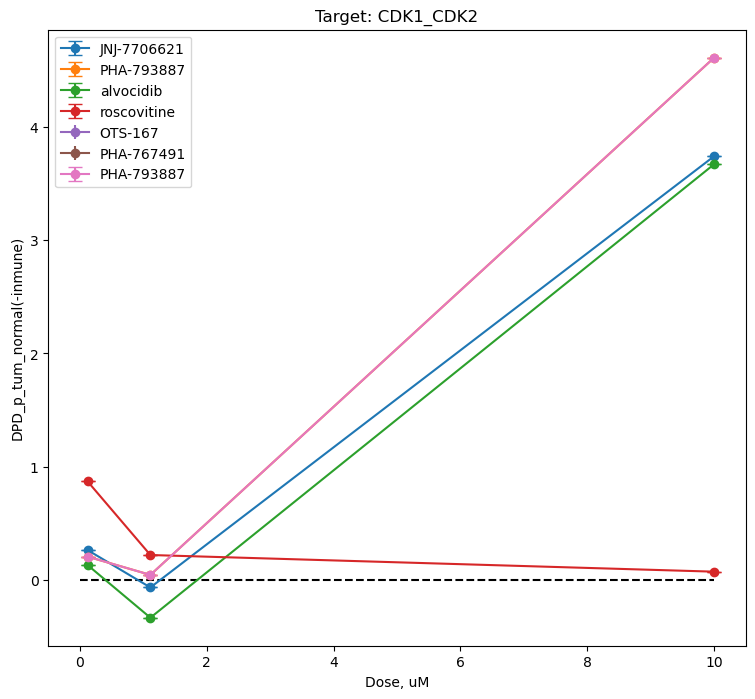

In [119]:
target_name = "CDK1_CDK2"
target_drugs = drugs_list#["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [21]:
# delete OTS-167
print_drugs += ["CGP-60474", "dinaciclib", "PHA-767491", "roscovitine"]

In [22]:
# delete for roscovitine dose 3,33 uM
labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == "roscovitine") & (sig_info_cell_df.dose_float == 3.33)].index.to_list()
print(labels)

['REP.A011_HUVEC.A_24H:O08']


### PAK

In [41]:
target = "PAK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PAK: 0 []


In [24]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
PF-03758309,PAK4,"0.04 uM, 0.12 uM, 0.125 uM, 0.37 uM, 1.11 uM, ..."


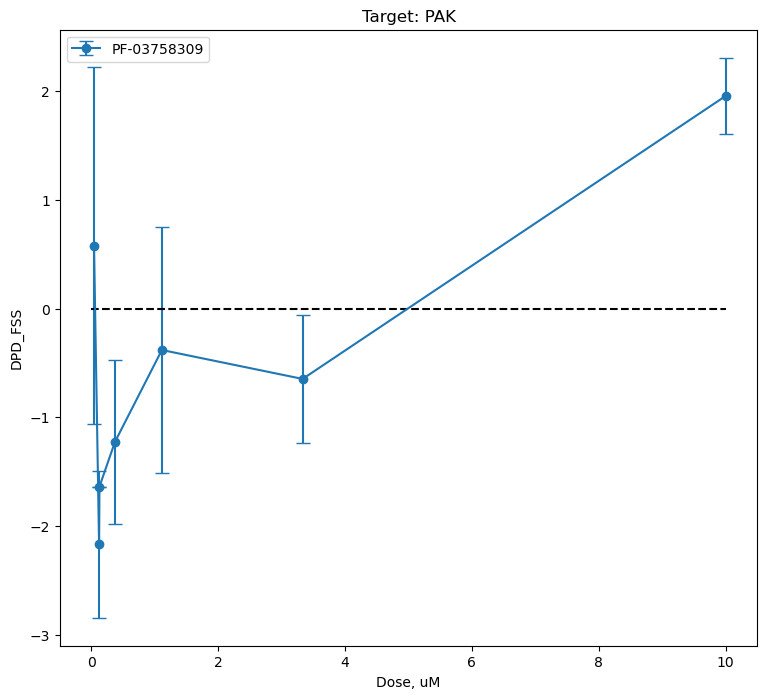

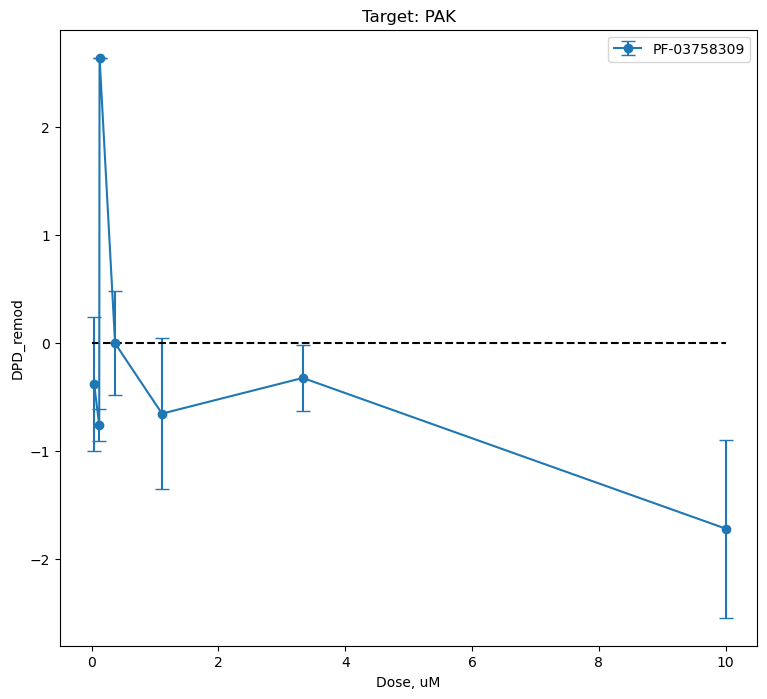

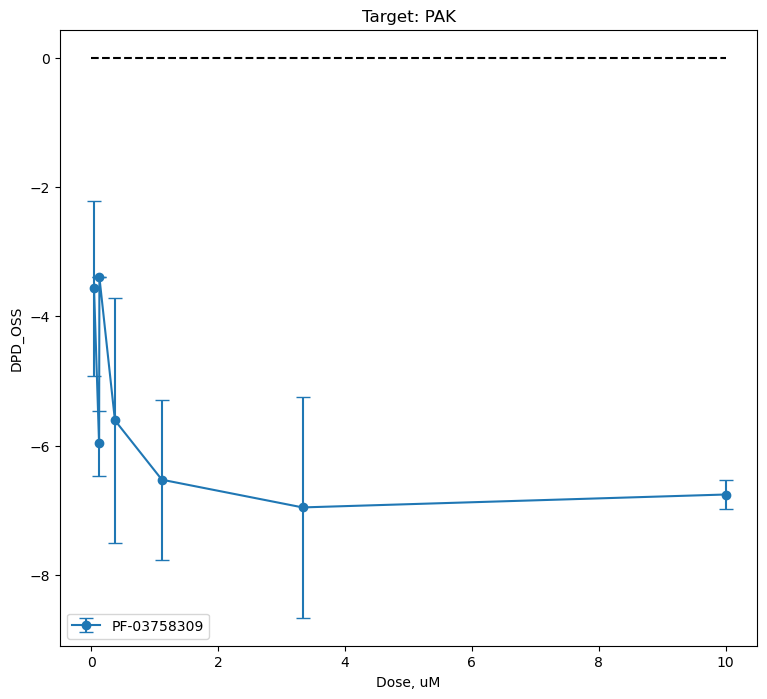

In [25]:
target_name = "PAK"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [26]:
print_drugs += target_drugs

In [27]:
# delete for PF-03758309 dose 10 uM

labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == "PF-03758309") & (sig_info_cell_df.dose_float == 10)].index.to_list()
print(labels)

['LJP009_HUVEC.A_24H:D01', 'LJP009_HUVEC_24H:D01']


### PI3K

In [42]:
target = "PIK3"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PIK3: 6 ['AS-605240', 'GDC-0349', 'LY-294002', 'NVP-BEZ235', 'PI-103', 'taselisib']


In [45]:
drugs_list = drugs #+ ["GSK-2334470", "A-66", "BGT-226", "BX-795"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AS-605240,PIK3CG,"0.12 uM, 1.11 uM, 10 uM"
GDC-0349,PIK3CA,"1.11 uM, 10 uM, 3.33 uM"
LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC","0.12 uM, 1.11 uM, 10 uM"
NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG","1.11 uM, 10 uM"
PI-103,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
taselisib,PIK3CA,"0.12 uM, 1.11 uM, 10 uM"


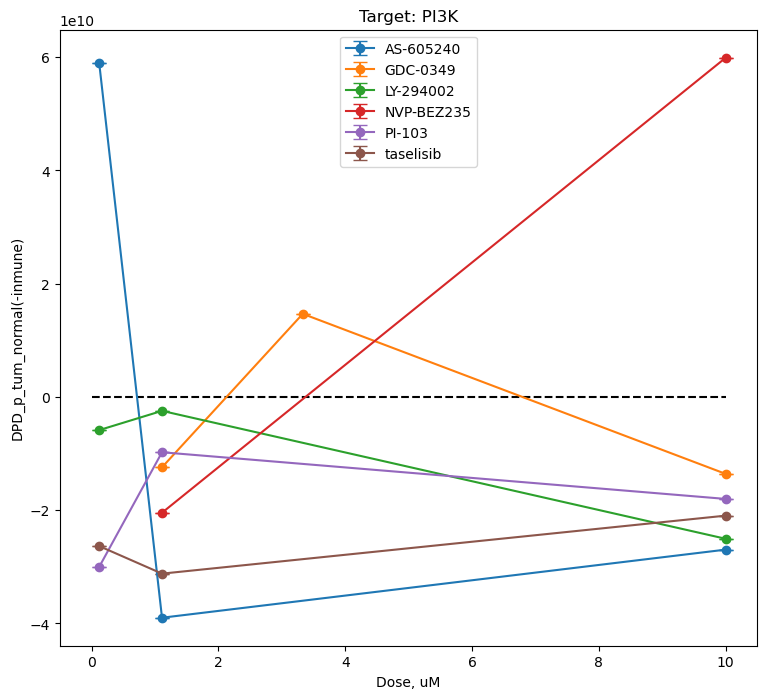

In [46]:
target_name = "PI3K"
target_drugs = drugs#["PF-04691502", "XL-147", "GSK-2334470", "A-66", "BGT-226", "BX-795"]
# deleted idelalisib, quercetin because other targets = PIK3CD, PIK3CG (delta, gamma, we use only alpha)


for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [31]:
print_drugs += target_drugs

### ERK

In [47]:
target_name = "ERK"

target = "MAP2K"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "MAPK"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "RAF"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target ERK: 7 ['AZ-628', 'PD-0325901', 'dabrafenib', 'selumetinib', 'sorafenib', 'trametinib', 'vemurafenib']


In [48]:
drugs_list = drugs + ["RAF-265"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AZ-628,"BRAF, RAF1","0.12 uM, 1.11 uM, 10 uM"
PD-0325901,MAP2K1,"0.12 uM, 1.11 uM, 10 uM"
dabrafenib,BRAF,"0.12 uM, 1.11 uM, 10 uM"
selumetinib,MAP2K1,"0.12 uM, 1.11 uM, 10 uM"
sorafenib,"BRAF, DDR2, FGFR1, FLT1, FLT3, FLT4, KDR, KIT,...","0.12 uM, 1.11 uM"
trametinib,"MAP2K1, MAP2K2","0.12 uM, 10 uM"
vemurafenib,BRAF,"0.12 uM, 1.11 uM, 10 uM"
RAF-265,,


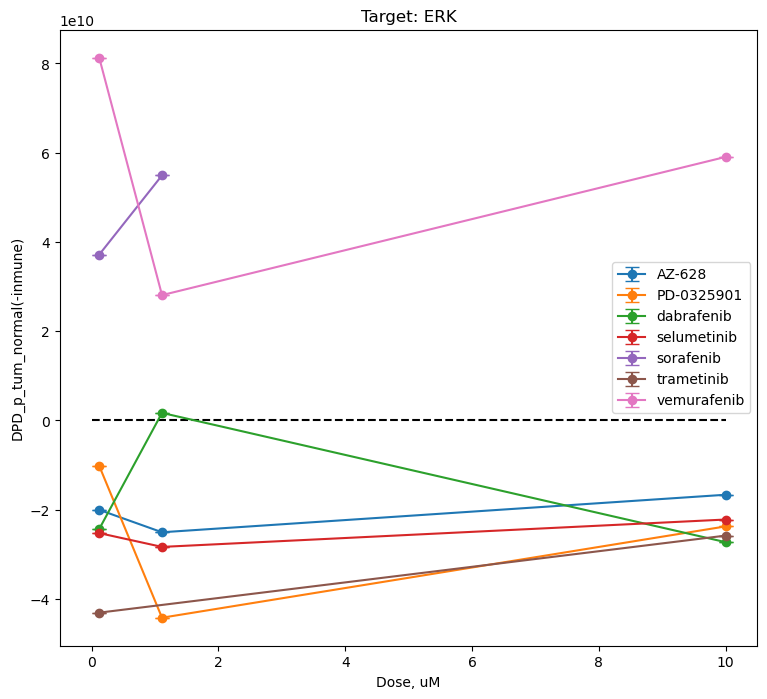

In [50]:
target_name = "ERK"
target_drugs = drugs#["AZ-628", "FR-180204", "GDC-0879", "GW-5074", "PD-0325901", "PD-184352", "TAK-733", "dabrafenib", "refametinib", "RAF-265"]
# deleted SB-203580 (MAPK1)
# select only gene name RAF1, BRAF, MAP2K1, MAP2K2, MAPK1, MAPK3   (Kinase pathway RAF->MEK->ERK) = module "ERK2

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [35]:
print_drugs += target_drugs

### BET

In [51]:
target = "BRD4"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target BRD4: 0 []


In [37]:
drugs_list = drugs + ["I-BET-151", "JQ-1-R", "PFI-1"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
I-BET-762,"BRD2, BRD3, BRD4","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
I-BET-151,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
JQ-1-R,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
PFI-1,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


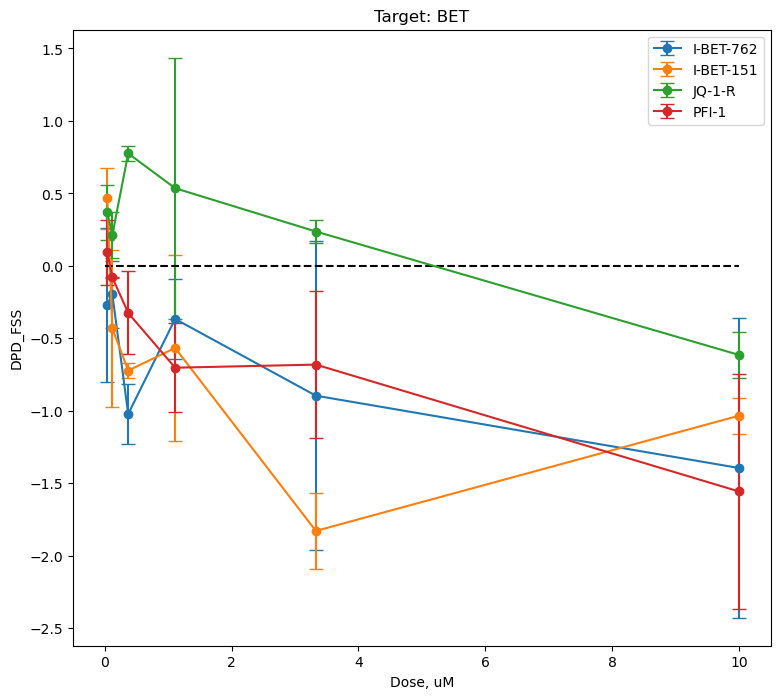

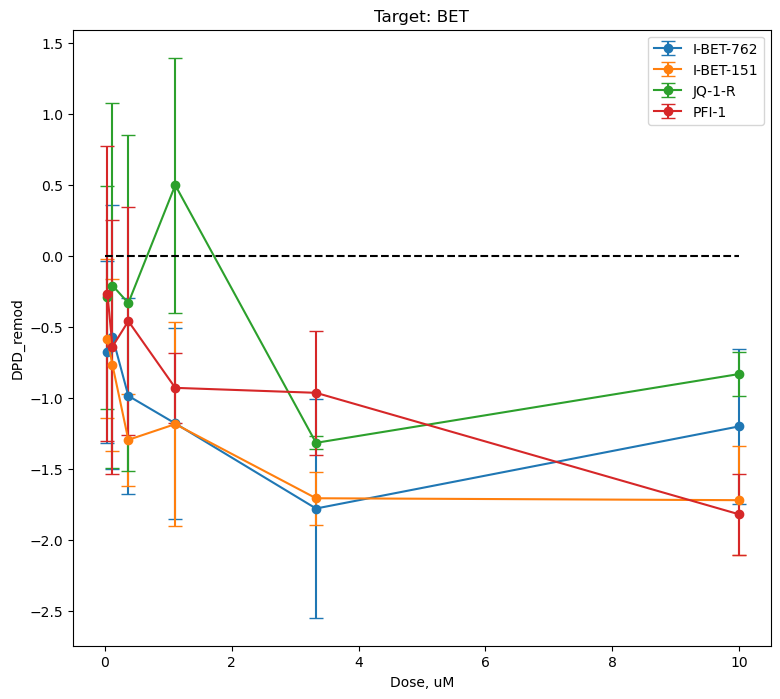

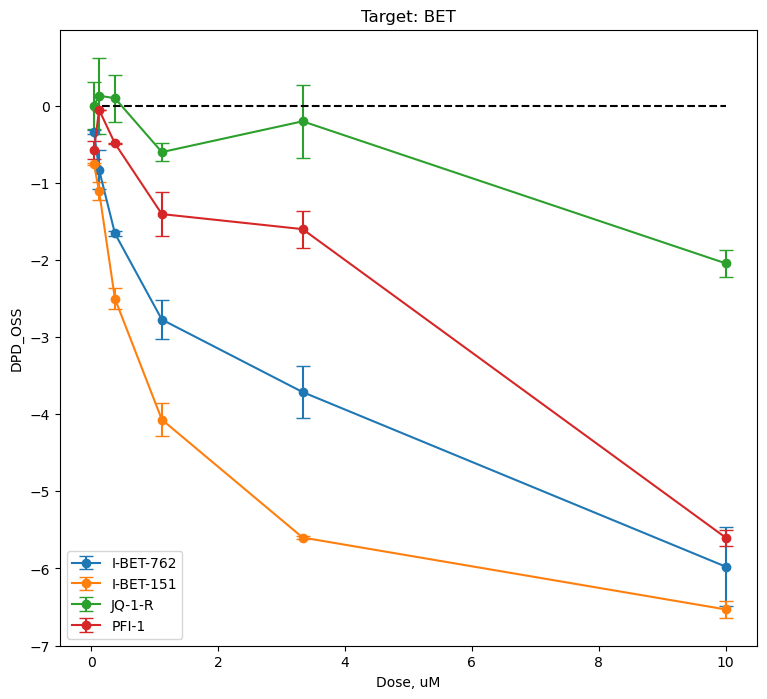

In [38]:
target_name = "BET"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [39]:
print_drugs += target_drugs

### Aurora

In [52]:
target = "AURK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target AURK: 3 ['JNJ-7706621', 'barasertib-HQPA', 'tozasertib']


In [53]:
drugs_list = drugs + ["aurora-a-inhibitor-i"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
barasertib-HQPA,AURKB,"0.12 uM, 1.11 uM, 10 uM"
tozasertib,"ABL1, AURKA, AURKB, AURKC, BCR, FLT3, JAK2","0.12 uM, 1.11 uM, 10 uM"
aurora-a-inhibitor-i,,


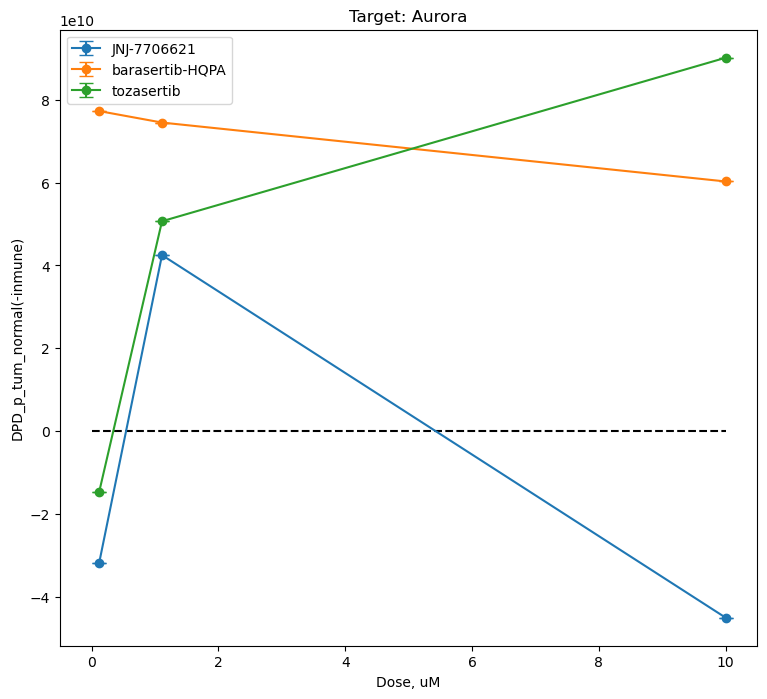

In [55]:
target_name = "Aurora"
target_drugs = drugs#["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib", "JWE-035"]
# deleted ENMD-2076, KW-2449, orantinib because other targets 
# deleted aurora-a-inhibitor-i (2017) - not in data 2020

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [43]:
# delete JWE-035 bacause no enought info
print_drugs += ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib"]

### TGFbR

In [58]:
target = "TGFBR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target TGFBR: 0 []


In [45]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
SB-525334,TGFBR1,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


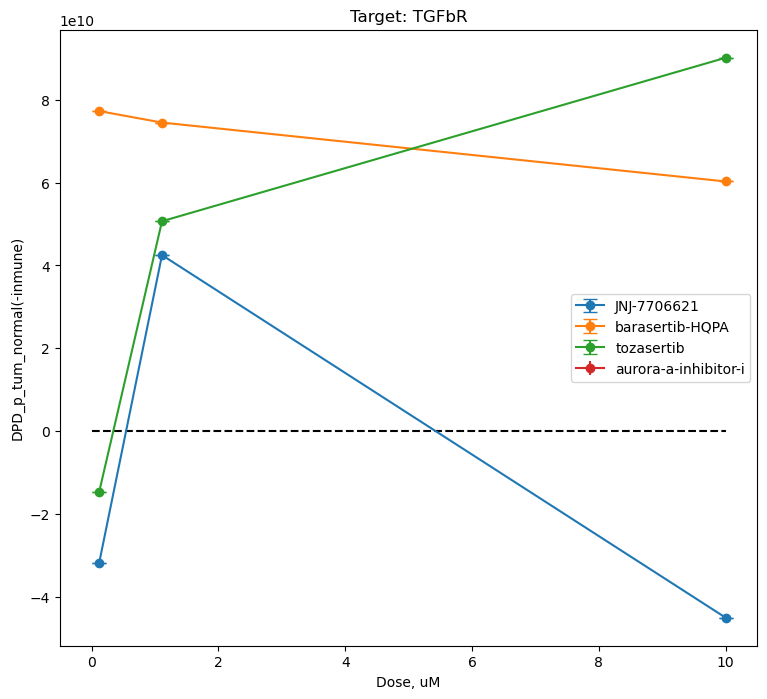

In [57]:
target_name = "TGFbR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [47]:
print_drugs += target_drugs

### VEGFR

In [59]:
drugs_list = ["rebastinib", "lenvatinib", "orantinib", "foretinib", "cediranib", "sunitinib", "tivozanib"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
rebastinib,,
lenvatinib,,
orantinib,,
foretinib,,
cediranib,,
sunitinib,,
tivozanib,,


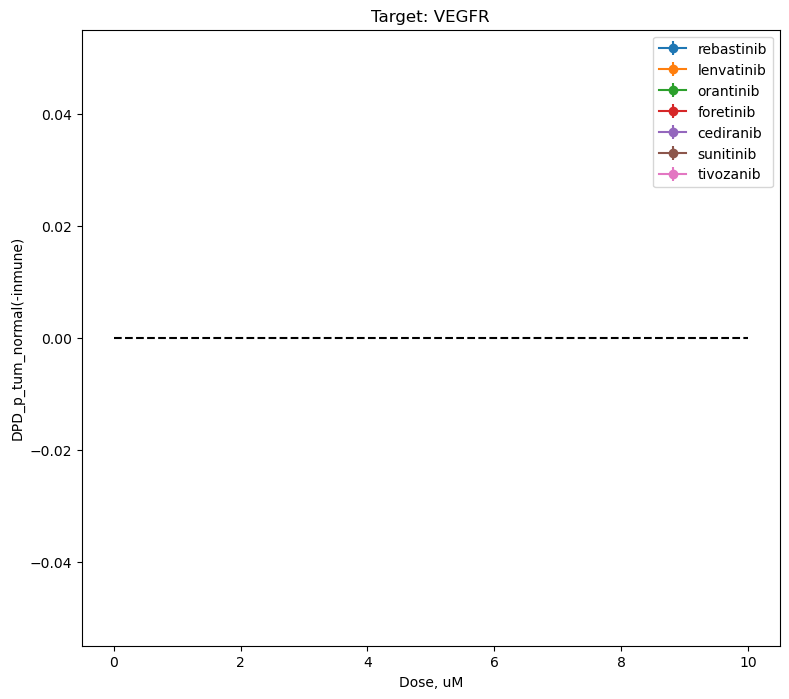

In [60]:
target_name = "VEGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [50]:
print_drugs += target_drugs

### PKC

In [61]:
target = "PRKC"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PRKC: 0 []


In [62]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses


/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_8953/974405492.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


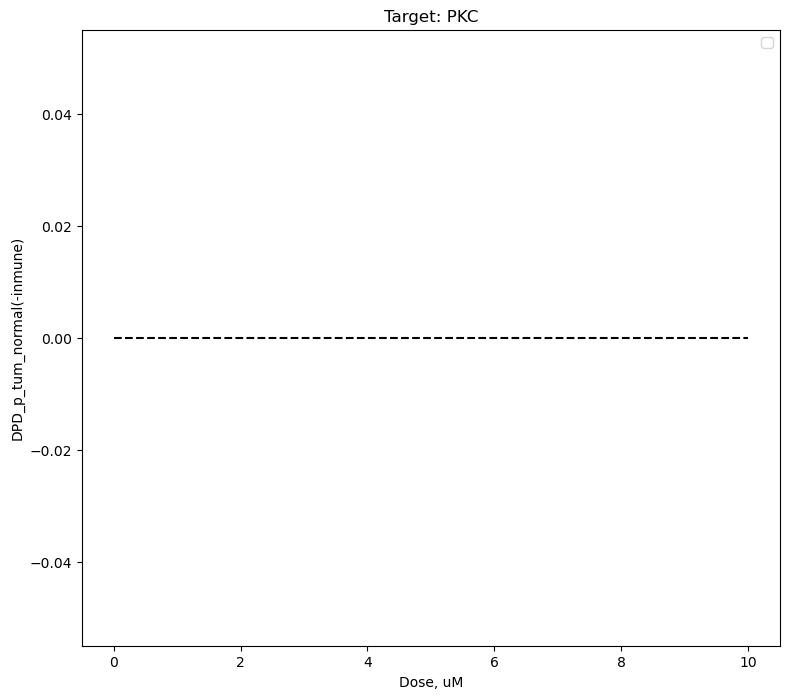

In [63]:
target_name = "PKC"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [54]:
print_drugs += target_drugs

### PTGS

In [64]:
target = "PTGS"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PTGS: 27 ['DUP-697', 'SC-560', 'aceclofenac', 'acemetacin', 'amtolmetin-guacil', 'asaraldehyde', 'diflunisal', 'epirizole', 'etoricoxib', 'flufenamic-acid', 'ibuprofen-piconol', 'icosapent', 'indoprofen', 'lornoxicam', 'lumiracoxib', 'metoxibutropate', 'nabumetone', 'nepafenac', 'niflumic-acid', 'paracetamol', 'phenacetin', 'rutaecarpine', 'salicylic-acid', 'sulfasalazine', 'suprofen', 'tiaprofenic-acid', 'tolmetin']


In [65]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
DUP-697,PTGS2,"1.11 uM, 10 uM, 3.33 uM"
SC-560,PTGS1,"1.11 uM, 10 uM, 3.33 uM"
aceclofenac,PTGS2,"1.11 uM, 10 uM, 3.33 uM"
acemetacin,"PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
amtolmetin-guacil,"PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
asaraldehyde,PTGS2,"1.11 uM, 10 uM, 3.33 uM"
diflunisal,"PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
epirizole,"PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
etoricoxib,PTGS2,"1.11 uM, 10 uM, 3.33 uM"
flufenamic-acid,"AKR1C3, AR, PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"


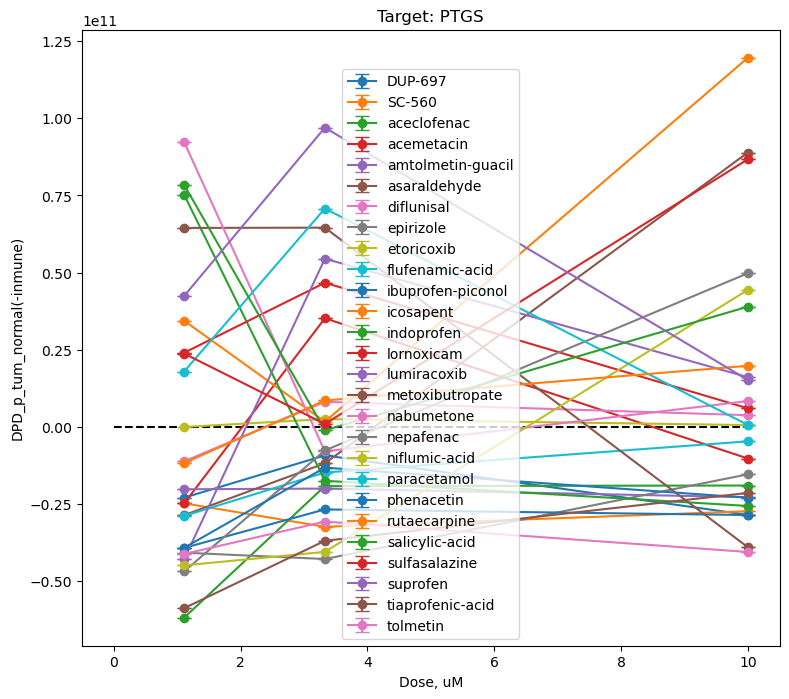

In [66]:
target_name = "PTGS"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [58]:
# delete module "PTGS"

### PSMB

In [67]:
target = "PSMB"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PSMB: 2 ['MG-132', 'ixazomib']


In [68]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
MG-132,PSMB1,"0.12 uM, 1.11 uM"
ixazomib,PSMB1,"0.12 uM, 1.11 uM, 10 uM"


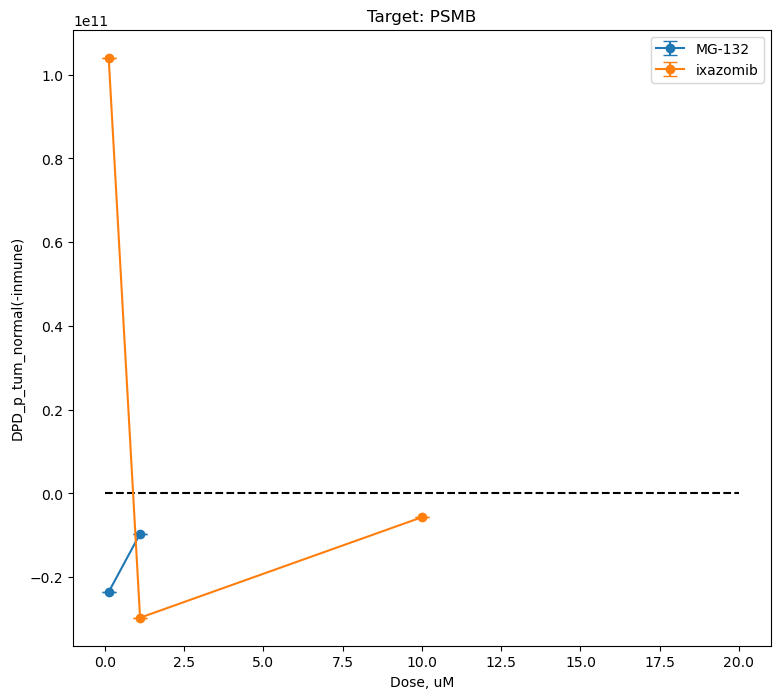

In [69]:
target_name = "PSMB"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,20], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [62]:
print_drugs += target_drugs

### GPBAR

In [63]:
target = "GPBAR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target GPBAR: 1 ['betulinic-acid']


In [64]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
betulinic-acid,GPBAR1,"0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."


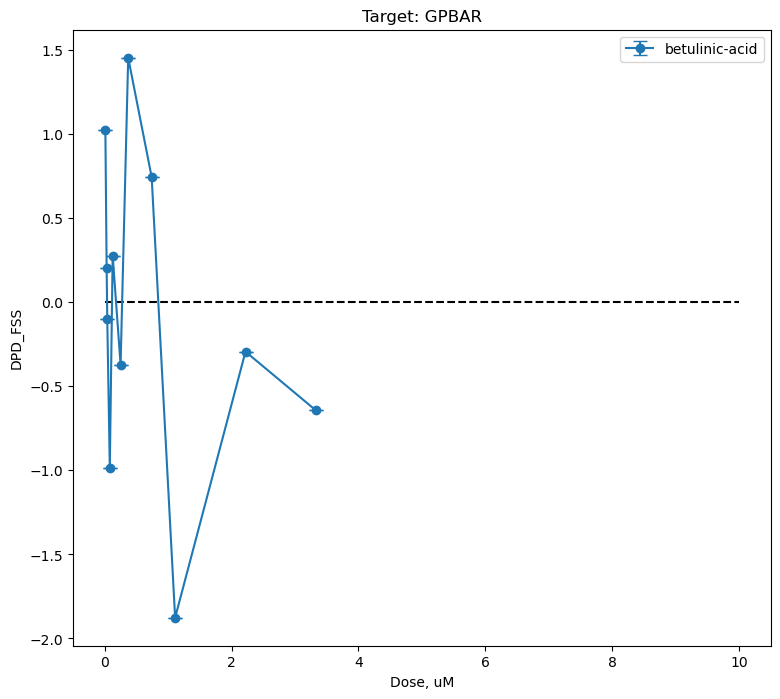

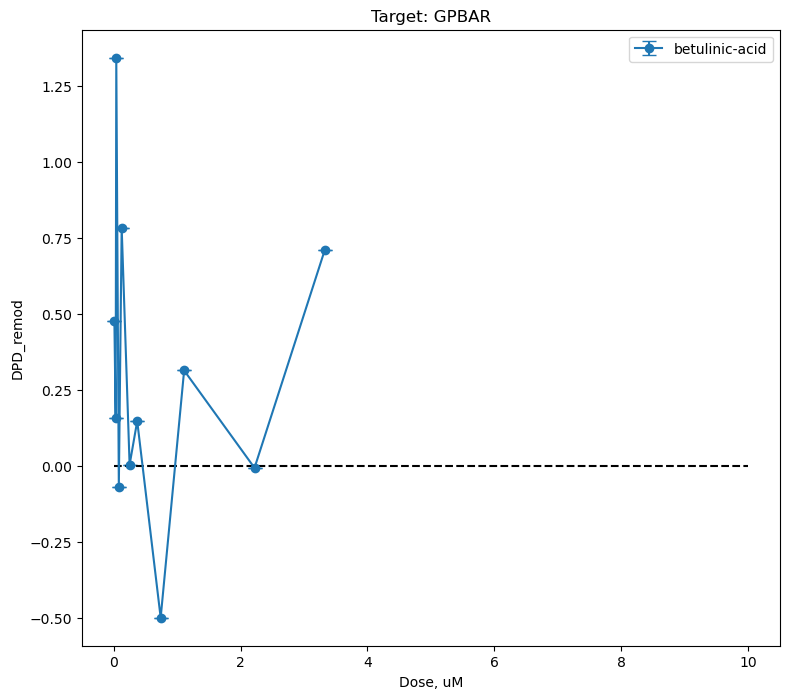

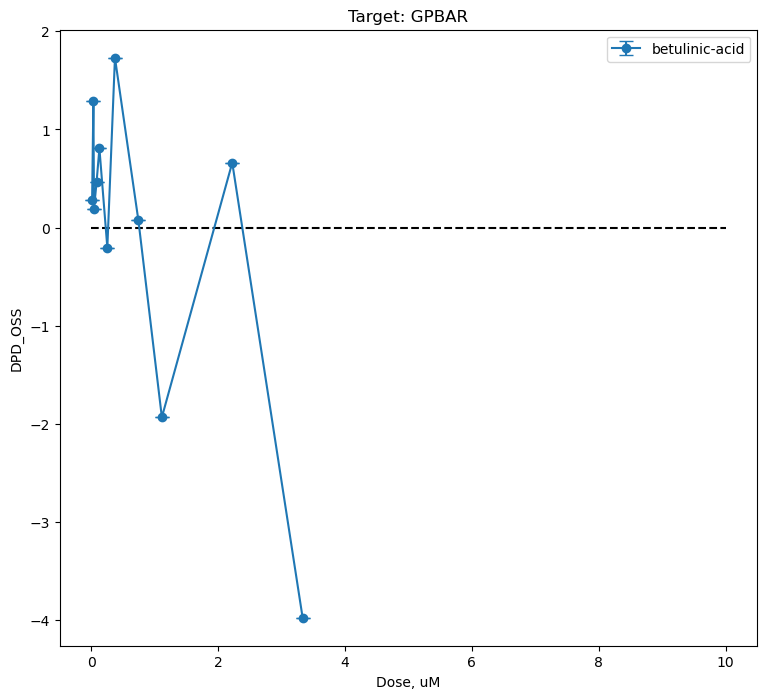

In [65]:
target_name = "GPBAR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [66]:
# delete module "GPBAR"

### PPARG

In [67]:
target = "PPARG"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PPARG: 6 ['balaglitazone', 'bezafibrate', 'ciglitazone', 'indometacin', 'mifobate', 'rosiglitazone']


In [68]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
balaglitazone,PPARG,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
bezafibrate,"PPARA, PPARD, PPARG","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
ciglitazone,PPARG,"0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
indometacin,"PPARG, PTGDR2, PTGS1, PTGS2","0.04 uM, 0.37 uM, 1.11 uM, 10 uM, 3.33 uM"
mifobate,PPARG,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
rosiglitazone,PPARG,"0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."


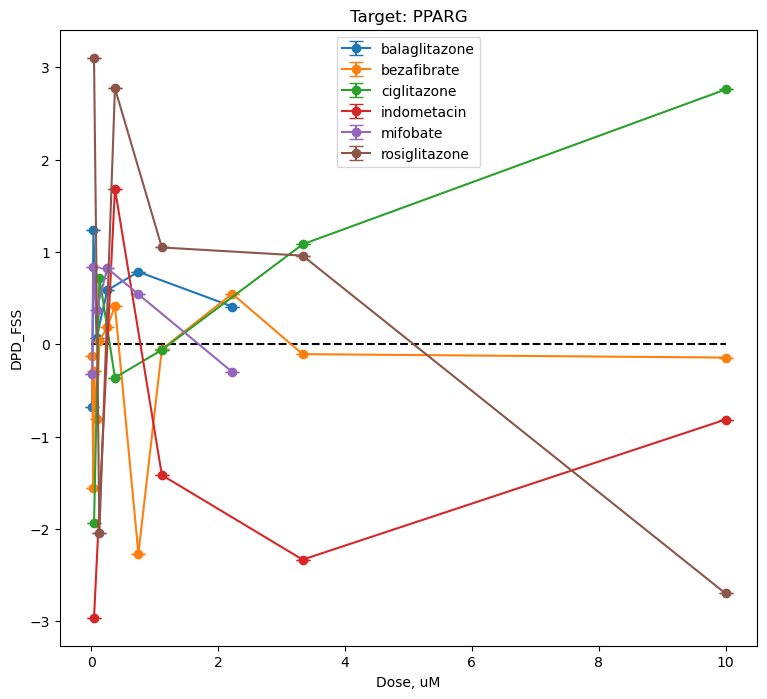

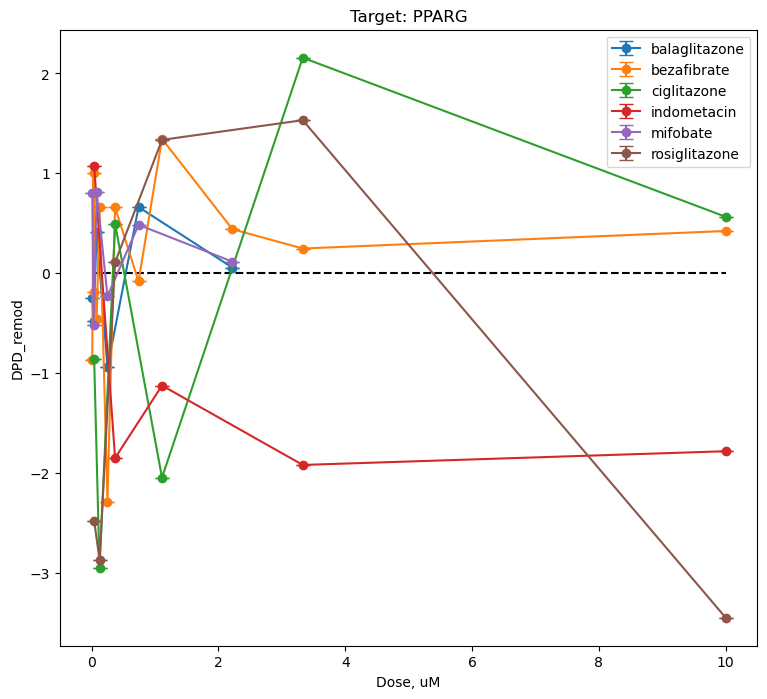

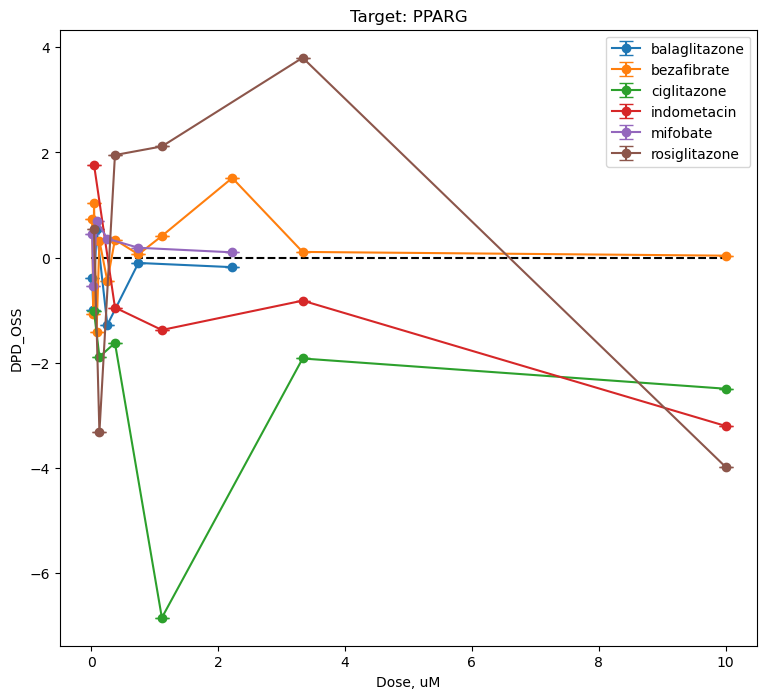

In [69]:
target_name = "PPARG"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [70]:
# delete module "PPARG"

In [71]:
print(print_drugs)

print_drugs_df = pd.DataFrame(print_drugs)
display(print_drugs_df)

print_drugs_df.to_excel("drugs.xlsx")

['CGP-60474', 'dinaciclib', 'PHA-767491', 'roscovitine', 'PF-03758309', 'PF-04691502', 'XL-147', 'GSK-2334470', 'A-66', 'BGT-226', 'BX-795', 'AZ-628', 'FR-180204', 'GDC-0879', 'GW-5074', 'PD-0325901', 'PD-184352', 'TAK-733', 'dabrafenib', 'refametinib', 'RAF-265', 'I-BET-762', 'I-BET-151', 'JQ-1-R', 'PFI-1', 'GSK-1070916', 'MLN-8054', 'ZM-447439', 'alisertib', 'SB-525334', 'rebastinib', 'lenvatinib', 'orantinib', 'foretinib', 'cediranib', 'sunitinib', 'tivozanib', 'enzastaurin', 'MG-132', 'bortezomib', 'ixazomib']


,0
0,CGP-60474
1,dinaciclib
2,PHA-767491
3,roscovitine
4,PF-03758309
5,PF-04691502
6,XL-147
7,GSK-2334470
8,A-66
9,BGT-226
